$$\text{This is the cutdown companion Jupyter notebook of Chapter 3, Quantum Circuit Model of Computation, of the book titled:}$$
$$\text{ "Quantum Chemistry and Computing for the Curious: Illustrated with Python and Qiskit® code" and with ISBN-13: 978-1803243900.}$$

The following MIT license only applies to the code, and not to the text and images. The authors are not granting a license to replicate or reuse the text and images in the companion Jupyter notebook.

# MIT License

Copyright (c) 2022 Packt

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# 3. Quantum Circuit Model of Computation



# Technical requirements

## Updates
Updates are presented in the following cells at the end of this notebook:
*   Summary of updates V3
*   Summary of updates V2

## Installing NumPy, and Qiskit and importing various modules
### Install NumPy with the following command:

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


### Install Qiskit with the following command:

In [2]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


### Install Qiskit visualization support with the following command:

In [3]:
pip install 'qiskit[visualization]'

Note: you may need to restart the kernel to use updated packages.


### Install qiskit.utils with the following command:

In [4]:
pip install qiskit.utils

Note: you may need to restart the kernel to use updated packages.


### Install Qiskit Aer with the following command:
https://qiskit.github.io/qiskit-aer/getting_started.html

Additional circuit methods. On import, Aer adds several simulation-specific methods to QuantumCircuit for convenience. These methods are not available until Aer is imported (import qiskit_aer).

In [5]:
pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.


### Install QuTiP with the following command:

In [6]:
pip install qutip

Note: you may need to restart the kernel to use updated packages.


### Import NumPy with the following command:

In [7]:
import numpy as np

### Import qiskit.aer

Additional circuit methods. On import, Aer adds several simulation-specific methods to QuantumCircuit for convenience. These methods are not available until Aer is imported (import qiskit_aer). https://qiskit.github.io/qiskit-aer/apidocs/circuit.html

In [8]:
import qiskit_aer
from qiskit_aer import AerSimulator

### Import the required functions and class methods with the following commands. 
The array_to_latex function() returns a Latex representation of a complex array with dimension 1 or 2:

In [9]:
from qiskit.visualization import array_to_latex, plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere, plot_state_city
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
import qiskit.quantum_info as qi
from qiskit.circuit.library import Initialize

### Import the math libraries with the following commands:

In [10]:
import cmath
import math

### Import QuTiP with the following command:

In [11]:
import qutip

# 3.1. Qubits, entanglement, Bloch sphere, Pauli matrices 

## 3.1.1. Qubits

## 3.1.2. Tensor ordering of qubits

## 3.1.3 Quantum entanglement

## 3.1.4. Bloch sphere

## 3.1.5. Displaying the Bloch vector corresponding to a statevector

In [12]:
_EPS = 1e-10 # Global variable used to chop small numbers to zero
def check(s):
  num_qubits = math.log2(len(s))
  # Check if param is a power of 2
  if num_qubits == 0 or not num_qubits.is_integer():
      raise Exception("Input complex vector length is not a positive power of 2.")
  num_qubits = int(num_qubits)
  if num_qubits > 1:
      raise Exception("Only one complex vector is allowed as input.")
  # Check if probabilities (amplitudes squared) sum to 1
  if not math.isclose(sum(np.absolute(s) ** 2), 1.0, abs_tol=_EPS):
      raise Exception("Norm of complex vector does not equal one.")
  return

In [13]:
def ToBloch(s, show=True):
  check(s)
  phi = cmath.phase(s[1]) - cmath.phase(s[0])
  theta = 2*math.acos(abs(s[0]))
  r1 = math.sin(theta)*math.cos(phi)
  r2 = math.sin(theta)*math.sin(phi)
  r3 = math.cos(theta)
  r = (r1,r2,r3)
  if show:
    display(array_to_latex(s, prefix="\\text{s} = ", precision = 2))
    display(array_to_latex([theta, phi], prefix="\\text{theta, phi} = ", precision = 2))
    display(array_to_latex(r, prefix="\\text{r} = ", precision = 2))
    b = qutip.Bloch()
    b.add_vectors(r)
    display(b.render())
  return theta, phi, r

In [14]:
s = [1/math.sqrt(2),complex(0.5, 0.5)]
(theta, phi, r) = ToBloch(s)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

None

In [15]:
def ToS(theta, phi, show=True):
  s = [math.cos(theta/2), complex(math.cos(phi) * math.sin(theta/2), math.sin(phi) * math.sin(theta/2))]
  if show:
    display(array_to_latex([theta, phi], prefix="\\text{theta, phi} = ", precision = 2))
    display(array_to_latex(s, prefix="\\text{s} = ", precision = 1))
  return s

In [16]:
s = ToS(np.pi/2, np.pi/4)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## 3.1.6. Pauli matrices

### Decomposing a matrix into the weighted sum of the tensor product of Pauli matrices


# 3.2. Quantum gates

## 3.2.1. Single qubit quantum gates

### X Gate

### H Gate

### General single qubit quantum gate

### Summary of single qubit quantum gates and useful relationships

## 3.2.2. Two qubits quantum gates

## 3.2.3. Three qubits quantum gates

## 3.2.4. Serially wired gates and parallel quantum gates

## 3.2.5. Creation of a Bell state

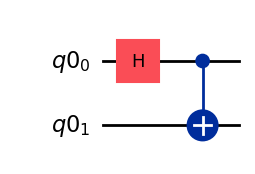

In [17]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[0])
qc.cx(q[0], q[1])

qc.draw(output='mpl')

Figure 3.14 – Qiskit quantum circuit that creates a Bell state

In [18]:
s = qi.Statevector.from_instruction(qc)
s.draw('latex')

<IPython.core.display.Latex object>

Figure 3.15 – Final state vector – Bell state

In [19]:
rho = qi.DensityMatrix.from_instruction(qc)
rho.draw('latex')

<IPython.core.display.Latex object>

Figure 3.16 – Density matrix – Bell state

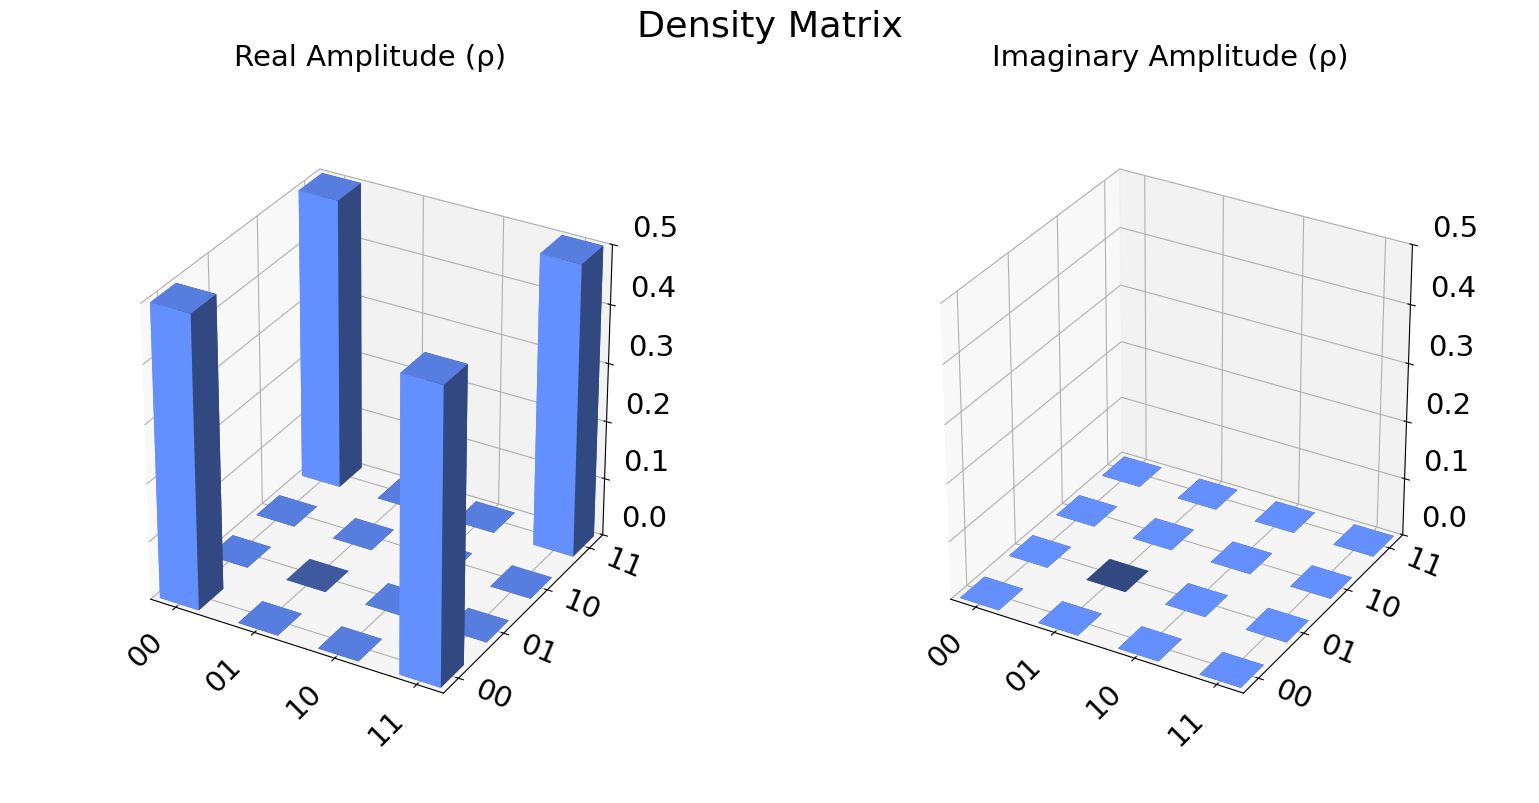

In [20]:
plot_state_city(rho.data, title='Density Matrix')

Figure 3.17 – Cityscape plot – Bell state

## 3.2.6. Parallel Hadamard gates

In [21]:
def create_parallel_H(n):
    q = QuantumRegister(n, 'q')
    qc = QuantumCircuit(q)
    for k in range(n):
        qc.h(k)
    return qc

In [22]:
def run_parallel_H(n):
  qc = create_parallel_H(n)
  s = qi.Statevector.from_instruction(qc)
  display(s.draw('latex'))
  display(qc.draw(output='mpl'))
  return

<IPython.core.display.Latex object>

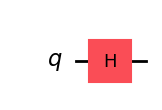

In [23]:
run_parallel_H(1)

Figure 3.18 – One Hadamard gate

<IPython.core.display.Latex object>

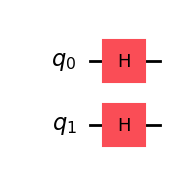

In [24]:
run_parallel_H(2)

Figure 3.19 – Two parallel Hadamard gates

<IPython.core.display.Latex object>

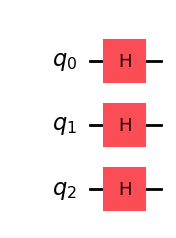

In [25]:
run_parallel_H(3)

Figure 3.20 – Three parallel Hadamard gates

# 3.3. Computation driven interference

## 3.3.1. Quantum computation process

## 3.3.2. Simulating interferometric sensing of a quantum superposition of left- and right-handed enantiomer states

In [26]:
#from qiskit.extensions import UnitaryGate
from qiskit.circuit.library import UnitaryGate

i = complex(0.0, 1.0)
BS = 1/np.sqrt(2) * np.array([[1,i],[i,1]])
BS = UnitaryGate(BS,'BS')

In [27]:
PBS = np.array([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]])
PBS = UnitaryGate(PBS,'PBS')

In [28]:
def show(qc):
  display(qc.draw(output='mpl'))
  s = qi.Statevector.from_instruction(qc)
  display(array_to_latex(s, prefix="\\text{state vector} = ", precision = 2))
  return

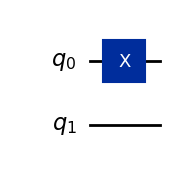

<IPython.core.display.Latex object>

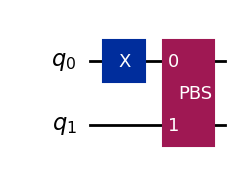

<IPython.core.display.Latex object>

In [29]:
q = QuantumRegister(2, 'q') # register of 2 qubits
# q[0] handedness qubit,|0⟩ left-handed, |1⟩ right-handed
# q[1] direction of propagation qubit, |0⟩ horizontal, |1⟩ vertical
qc = QuantumCircuit(q)

qc.x([0]) # Right-handed
show(qc)

qc.append(PBS, q)
show(qc)

Figure 3.21 – Simulation of the interaction of a right-handed enantiomer with a polarizing beam splitter

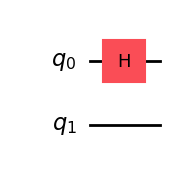

<IPython.core.display.Latex object>

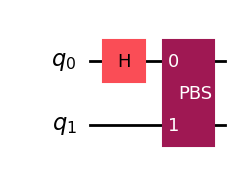

<IPython.core.display.Latex object>

In [30]:
q = QuantumRegister(2, 'q') # register of 2 qubits
# q[0] handedness qubit,|0⟩ left-handed, |1⟩ right-handed
# q[1] direction of propagation qubit, |0⟩ horizontal, |1⟩ vertical
qc = QuantumCircuit(q)

qc.h(q[0]) # Put enantiomer in a superposition of left- and right-handed states
show(qc)

qc.append(PBS, q)
show(qc)

Figure 3.22 – Simulation of the interaction of a left- and right-handed enantiomer with a polarizing beam splitter

# 3.4. Preparing a permutation symmetric or antisymmetric state

## 3.4.1. Creating random states

In [31]:
def init_random():
  # Create random 1-qubit state s1
  s1 = qi.random_statevector(2)
  display(array_to_latex(s1, prefix="\\text{State 1} =", precision=2))

  # Create random 1-qubit state s2
  s2 = qi.random_statevector(2)
  display(array_to_latex(s2, prefix="\\text{State 2} =", precision =2))
  
  return s1, s2

## 3.4.2. Creating a quantum circuit and initializing qubits



In [32]:
def setup_qc(s1, s2, draw=False):
  init_q1 = Initialize(s1)
  init_q1.label = "init_q1"

  init_q2 = Initialize(s2)
  init_q2.label = "init_q2"

  q = QuantumRegister(3, 'q') # register of 3 qubits
  c = ClassicalRegister(1, name="c") # and 1 classical register
  qc = QuantumCircuit(q,c)
  qc.append(init_q1, [1])
  qc.append(init_q2, [2])
  qc.barrier()
  if draw:
    display(qc.draw(output='mpl'))
  return qc, q, c

## 3.4.3. Creating a circuit that swaps two qubits with a controlled swap gate

In [33]:
def swapper(draw=False):
  q = QuantumRegister(3, 'q') # register of 3 qubits
  qc = QuantumCircuit(q, name='Swapper')
  qc.h(q[0])
  qc.cswap(q[0], q[1], q[2])
  qc.h(q[0])
  if draw:
    print("Swapper circuit")
    display(qc.draw(output='mpl'))
  return qc

Swapper circuit


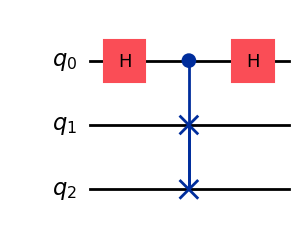

<IPython.core.display.Latex object>

In [34]:
q = QuantumRegister(3, 'q') # register of 3 qubits
qc = QuantumCircuit(q)
qc.append(swapper(draw=True), qargs=q)

# qiskit providers https://docs.quantum.ibm.com/api/migration-guides/qiskit-1.0-features#basicaer-1
U = qi.Operator(qc)

array_to_latex(U, prefix="\\text{swapper unitary} = ", precision = 2)

Figure 3.23 – Unitary matrix of the swapper circuit

### Computing the action of the swapper unitary

### Computing the final state when the control qubit $|q_0\rangle$ is measured

### Computing the final state when the control qubit $|q_0\rangle$ is measured in state $|1\rangle$

## 3.4.4. Post selecting the control qubit until desired state is obtained

In [35]:
def post_select(qc, q, c, symm=True, method='statevector', shots=1, max_iter=20, swap_test=False):
  # Simulating your first quantum program with Qiskit Aer
  # https://qiskit.github.io/qiskit-aer/getting_started.html
  aer_sim = AerSimulator(method=method)
  
  s = qi.Statevector(qc)
  display(array_to_latex(s, prefix="\\text{Initial state} = ", precision = 2))
  done = False
  n_iter = 0
  
  while not done and n_iter < max_iter:
    qc.append(swapper(draw=(n_iter==0)), qargs=q)
    qc.measure(q[0], c[0]) # Measure control qubit q[0]
    
    qc.save_statevector(label=str(n_iter)) # Save the current simulator state vector
    
    new_circuit = transpile(qc, aer_sim)
    job = aer_sim.run(new_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    
    for k, v in counts.items():
      if symm and k == '0' and v > shots/2:
        done = True
      elif not symm and k == '1' and v > shots/2:
        done = True
      
    if not done:
      qc.reset(q[0])
      n_iter += 1
  
  success = proc_result(result, qc, n_iter, counts, max_iter=max_iter, symm=symm, method=method, swap_test=swap_test)
  return result, success

In [36]:
def proc_result(result, qc, n_iter, counts, max_iter=20, symm=True, method='statevector', swap_test=False):
  if symm:
    print("Preparing a permutation symmetric state")
  else:
    print("Preparing a permutation antisymmetric state")
  print("method:", method)
  print("counts: ", counts)
  
  if n_iter >= max_iter:
    print("Post selection unsuccessful iteration {}".format(n_iter))
    success = False
  else:
    print("Post selection successful iteration {}".format(n_iter))
    success = True
    s = result.data()[str(n_iter)]
    factor(s, symm) # Call factor()

    if swap_test:
      swap_check(qc, q, n_iter, symm, s, method=method)
    
    print(" ") # Display Density matrix of the final state
    display(array_to_latex(qi.DensityMatrix(s), prefix="\\text{Density matrix of the final state: }", precision = 2))
    display(plot_state_city(s, title='Cityscape plot of the final state')) # Display Cityscape plot of the final state
    
  return success

In [37]:
def sym_test(s, symm, i0, i1):
  if symm:
    b = np.isclose(np.abs(s[i0]-s[i1]), 0, rtol=_EPS) and np.isclose(np.abs(s[i0]**2 + s[i1]**2), 1, rtol=1e-4)
  else:
    b = np.isclose(np.abs(s[i0]+s[i1]), 0, rtol=_EPS) and np.isclose(np.abs(s[i0]**2 + s[i1]**2), 1, rtol=1e-4)
  return b

In [38]:
def factor(s, symm):
  b0 = np.allclose(s, [1, 0, 0, 0, 0, 0, 0, 0], rtol=_EPS)
  b1 = np.allclose(s, [0, 0, 0, 0, 0, 0, 1, 0], rtol=_EPS)
  b2 = sym_test(s, symm, 2, 4)
  b3 = sym_test(s, symm, 3, 5)
  b4 = sym_test(s, symm, 0, 6)
  b5 = sym_test(s, symm, 1, 7)
  df = {b0: "|00", b1: "|11", b2: "|\\Psi_+", b3: "|\\Psi_-", b4: "|\\Phi_+", b5: "|\\Phi_-"}
  found = False
  for k, v in df.items():
    if not found and symm and k:
      display(array_to_latex([s], prefix = "\\text{Symmetrized state: }" + v + "\\rangle, \\text{  Final state: }" + v + " \\rangle |0 \\rangle =", precision = 2))
      found = True
    elif not found and not symm and k:
      display(array_to_latex([s], prefix = "\\text{Antisymmetrized state: }" + v + "\\rangle, \\text{  Final state: }" + v + " \\rangle |1 \\rangle =", precision = 2))
      found = True
  if not found:
    display(array_to_latex(s, prefix="\\text{Final state} = ", precision = 2))
  return

In [39]:
def swap_check(qc, q, n_iter, symm, s, method='statevector'):
  s21 = swap(qc, q, n_iter, method=method)
  if symm:
    if np.allclose(s-s21, 0, rtol=_EPS):
      print("Swap test confirms that final state is permutation symmetric")
  else:
    if np.allclose(s+s21, 0, rtol=_EPS):
      print("Swap test confirms that final state is permutation asymmetric")
  return

In [40]:
def swap(qc, q, n_iter, method='statevector'):
  aer_sim = AerSimulator(method=method)
  qc.swap(q[1], q[2])
  qc.measure(q[0], c[0]) # Measure control qubit q[0]
  qc.save_statevector(label=str(n_iter+1)) # Save the current simulator state vector
  new_circuit = transpile(qc, aer_sim)
  job = aer_sim.run(new_circuit, shots=1)
  result = job.result()
  s21 = result.data()[str(n_iter+1)]
  return s21

## 3.4.5. Examples of final symmetrized and antisymmetrized states

### Experiment creating a symmetrized state from state $|10\rangle$

<IPython.core.display.Latex object>

Swapper circuit


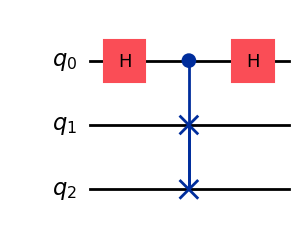

Preparing a permutation symmetric state
method: statevector
counts:  {'0': 1}
Post selection successful iteration 0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

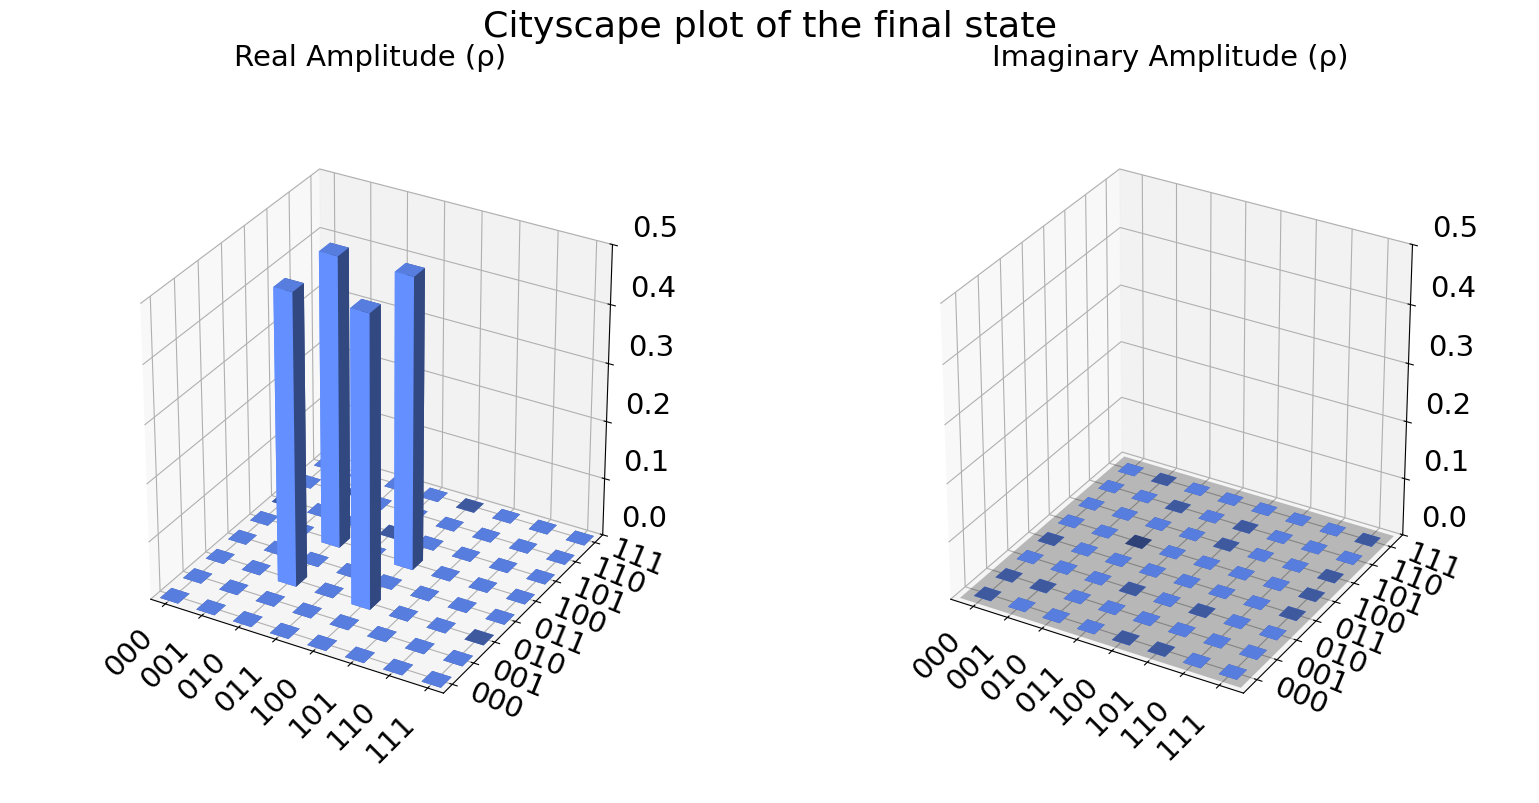

In [41]:
s1 = qi.Statevector([0, 1])
s2 = qi.Statevector([1, 0])
qc, q, c = setup_qc(s1, s2)
result, success = post_select(qc, q, c, symm=True)

Figure 3.24 – Symmetrized state obtained from state $|10\rangle$

Figure 3.25 – Cityscape plot of the symmetrized state obtained from state $|10\rangle$

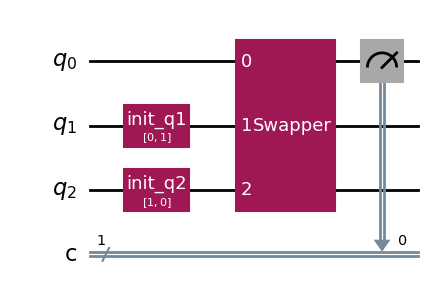

In [42]:
qc.draw(output='mpl', plot_barriers=False)

Figure 3.26 – Quantum circuit after one or more iterations

### Experiment creating an antisymmetrized state from from state $|10\rangle$


<IPython.core.display.Latex object>

Swapper circuit


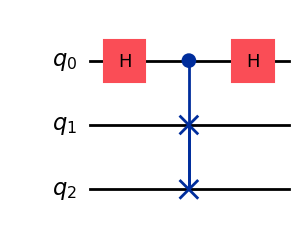

Preparing a permutation antisymmetric state
method: statevector
counts:  {'1': 1}
Post selection successful iteration 0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

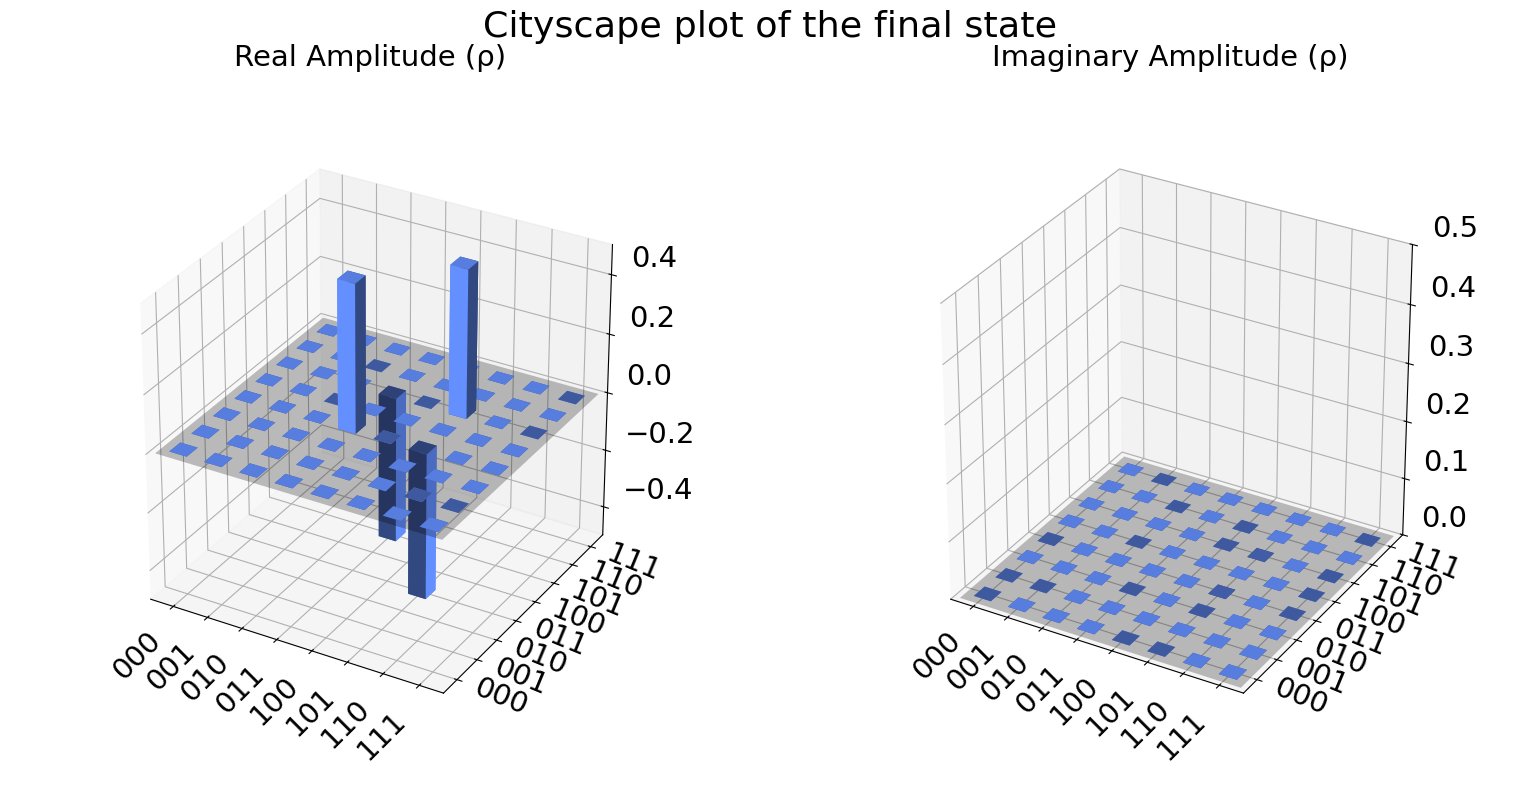

In [43]:
s1 = qi.Statevector([0, 1])
s2 = qi.Statevector([1, 0])
qc, q, c = setup_qc(s1, s2)
result, success = post_select(qc, q, c, symm=False)

Figure 3.27 – Antisymmetrized state obtained from state $|10\rangle$

Figure 3.28 – Cityscape plot of the antisymmetrized state obtained from state  $|10\rangle$

### Experiment creating a symmetrized state from qubits initialized with random states

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Swapper circuit


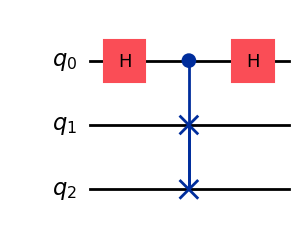

Preparing a permutation symmetric state
method: statevector
counts:  {'0': 1}
Post selection successful iteration 0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

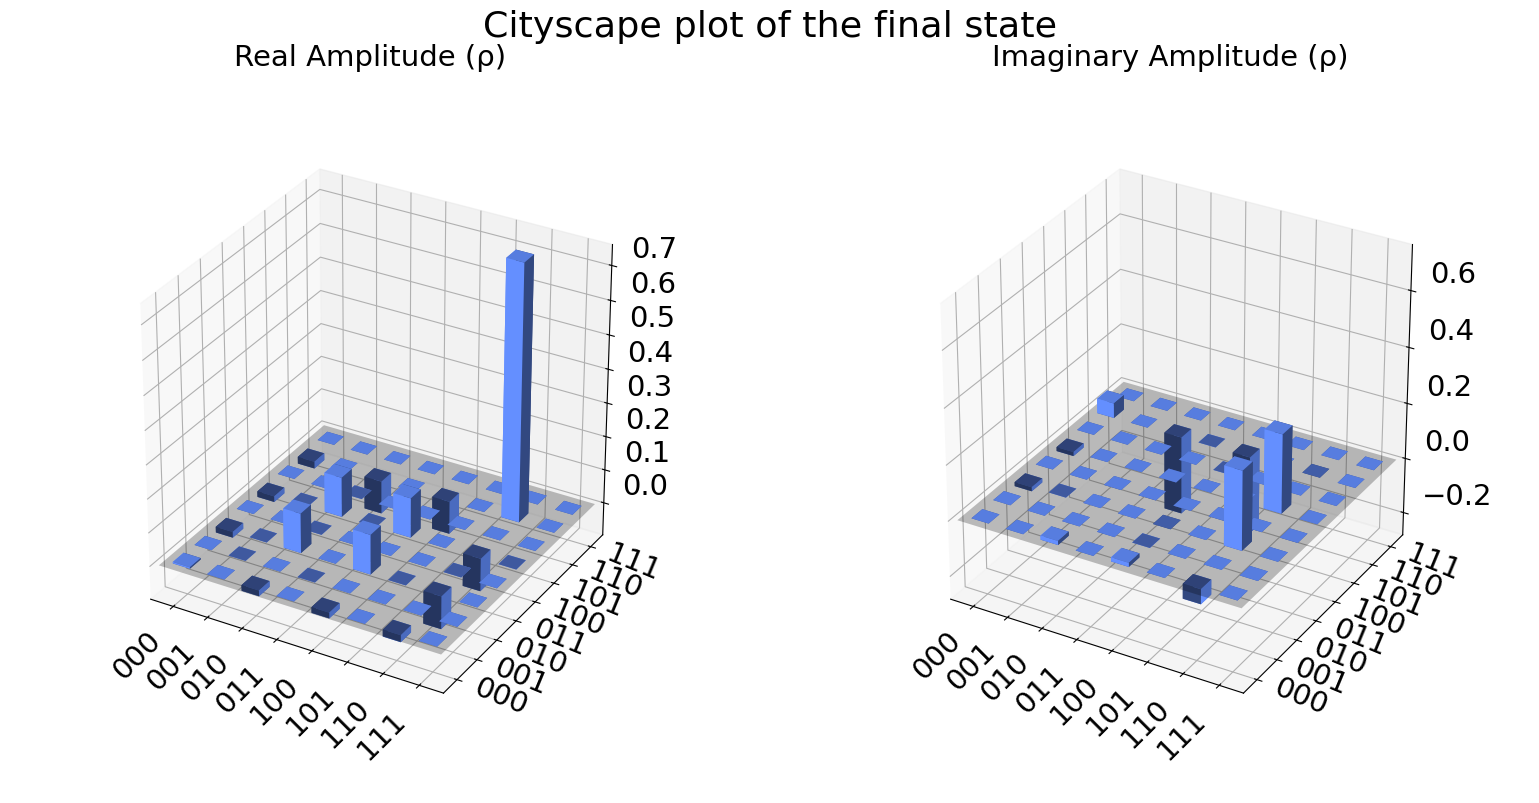

In [44]:
s1, s2 = init_random()
qc, q, c = setup_qc(s1, s2)
result, success = post_select(qc, q, c, symm=True, swap_test=True)

Figure 3.29 – Symmetrized state obtained from qubits initialized in random states

Figure 3.30 – Cityscape plot of symmetrized state obtained from qubits initialized in random states

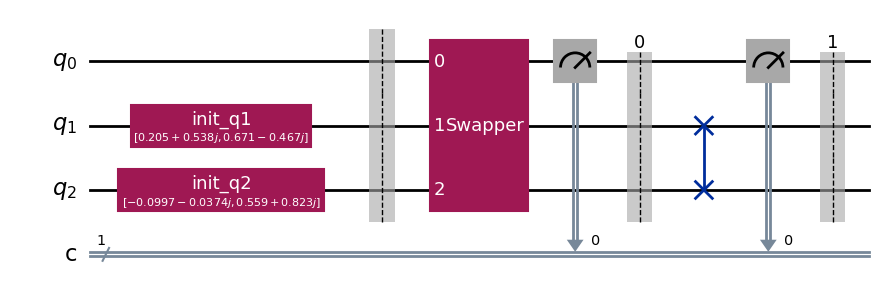

In [45]:
qc.draw(output='mpl')

### Experiment creating an antisymmetrized state from qubits initialized with random states

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Swapper circuit


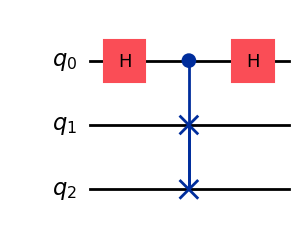

Preparing a permutation antisymmetric state
method: statevector
counts:  {'1': 1}
Post selection successful iteration 0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

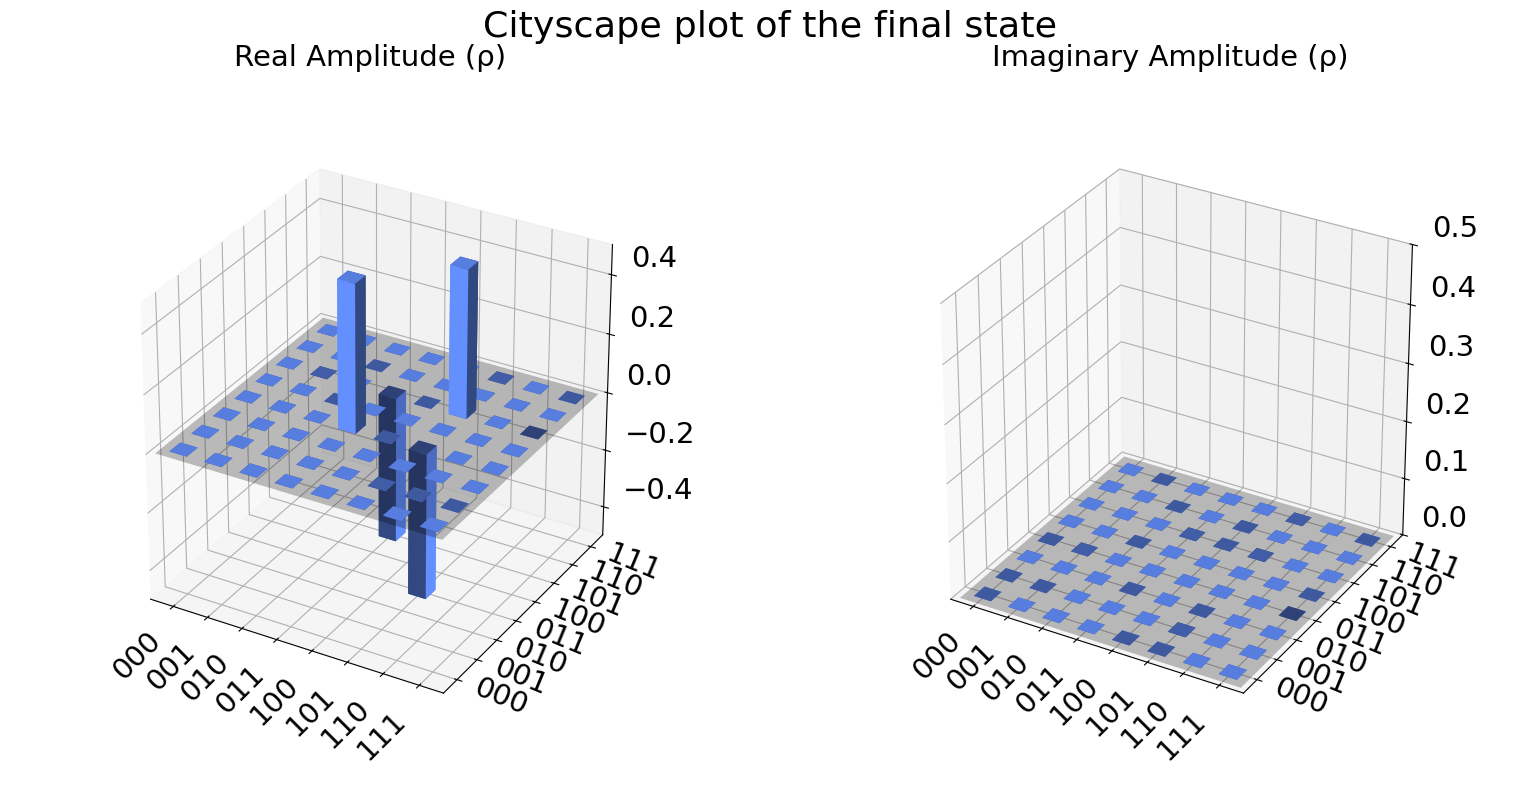

In [46]:
s1, s2 = init_random()
qc, q, c = setup_qc(s1, s2)
result, success = post_select(qc, q, c, symm=False, swap_test=True)

Figure 3.31 – Antisymmetrized state obtained from qubits initialized in random states

Figure 3.32 – Cityscape plot of the antisymmetrized state obtained from qubits initialized in random states

### Experiment creating a symmetrized state from the Bell state $|\Phi_+\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$

In [47]:
def setup1_qc(draw=False):
  q = QuantumRegister(3, 'q') # register of 3 qubits
  c = ClassicalRegister(1, name="c") # and 1 classical register
  qc = QuantumCircuit(q,c)
  qc.h(q[1])
  qc.cx(q[1], q[2])
  qc.barrier()
  if draw:
    display(qc.draw(output='mpl'))
  return qc, q, c

<IPython.core.display.Latex object>

Swapper circuit


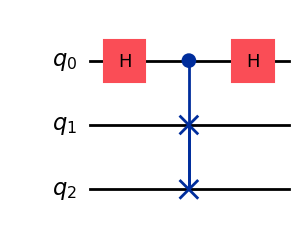

Preparing a permutation symmetric state
method: statevector
counts:  {'0': 1}
Post selection successful iteration 0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

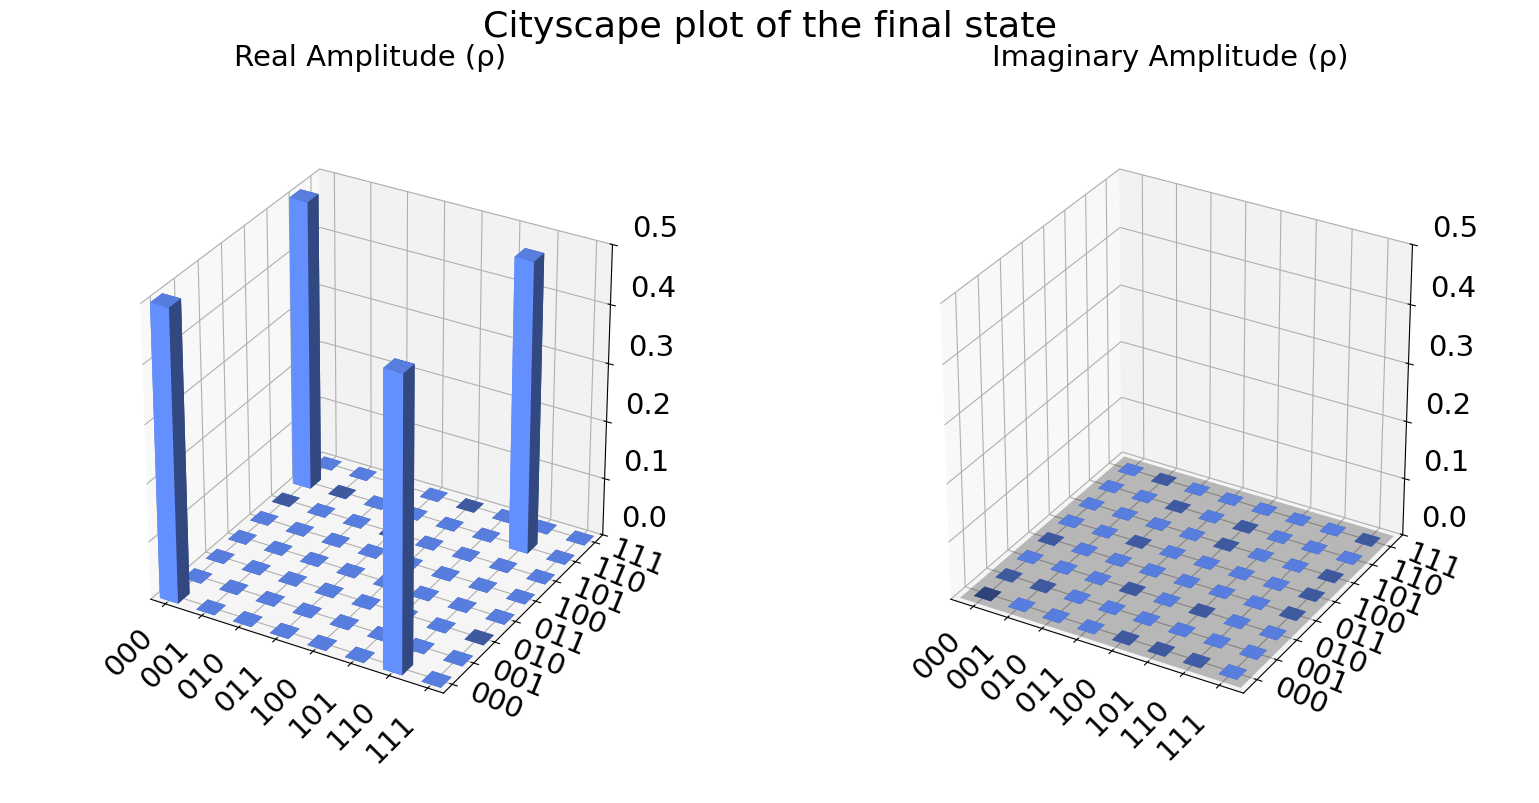

In [48]:
qc, q, c = setup1_qc()
result, success = post_select(qc, q, c, symm=True)

Figure 3.33 – Symmetrized state obtained from the Bell state $|\Phi_+\rangle$

Figure 3.34 – Cityscape plot of the final state obtained from the Bell state $|\Phi_+\rangle$

# Summary of updates V3
This jupyter notebook has been updated to work with Qiskit 1.0.2 and Qiskit Nature 0.7.2.

Please refer to the following documentation:
- Qiskit 1.0 feature changes, https://docs.quantum.ibm.com/api/migration-guides/qiskit-1.0-features#qiskit-10-feature-changes
- Qiskit 1.0 migration tool, https://docs.quantum.ibm.com/api/migration-guides/qiskit-1.0-features#qiskit-10-migration-tool
- Qiskit Aer 0.14.0.1, Getting started, https://qiskit.github.io/qiskit-aer/getting_started.html
- Qiskit Nature 0.7.2, Qiskit Nature overview, https://qiskit-community.github.io/qiskit-nature/
- Qiskit Nature Migration Guides, https://qiskit-community.github.io/qiskit-nature/migration/index.html

## Updates in install statements
### Install qiskit.aer
New
```
### Install Qiskit Aer with the following command:
https://qiskit.github.io/qiskit-aer/getting_started.html
pip install qiskit_aer
```
## Updates in import statements
### Import qiskit.aer
Additional circuit methods. On import, Aer adds several simulation-specific methods to QuantumCircuit for convenience. These methods are not available until Aer is imported (import qiskit_aer). https://qiskit.github.io/qiskit-aer/apidocs/circuit.html

New
```
import qiskit_aer
from qiskit_aer import AerSimulator
```

Previously
```
from qiskit.visualization import array_to_latex, plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere, plot_state_city
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit import execute, Aer
import qiskit.quantum_info as qi
from qiskit.extensions import Initialize
#from qiskit.providers.aer import extensions  # import aer snapshot instructions (V2)
```
New
```
from qiskit.visualization import array_to_latex, plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere, plot_state_city
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
import qiskit.quantum_info as qi
from qiskit.circuit.library import Initialize
```
Previously
```
from qiskit.extensions import UnitaryGate
```
New
```
from qiskit.circuit.library import UnitaryGate
```
## Updates in code
### Updated code to get the unitary matrix corresponding to the swapper quantum circuit
Previously
```
q = QuantumRegister(3, 'q') # register of 3 qubits
qc = QuantumCircuit(q)
qc.append(swapper(draw=True), qargs=q)

# Selecting the unitary_simulator
backend = Aer.get_backend('unitary_simulator')

# Executing the job and getting the result as an object
job = execute(qc, backend)
result = job.result()

# Getting the unitary matrix from the result object
U = result.get_unitary(qc, decimals=2)
array_to_latex(U, prefix="\\text{swapper unitary} = ", precision = 2)
```
New
```
q = QuantumRegister(3, 'q') # register of 3 qubits
qc = QuantumCircuit(q)
qc.append(swapper(draw=True), qargs=q)

# qiskit providers https://docs.quantum.ibm.com/api/migration-guides/qiskit-1.0-features#basicaer-1
U = qi.Operator(qc)

array_to_latex(U, prefix="\\text{swapper unitary} = ", precision = 2)
```
### Updated post_select() function
Previously
```
def post_select(qc, q, c, symm=True, simulator='statevector_simulator', shots=1, max_iter=20, swap_test=False):
  backend = Aer.get_backend(simulator)
  s = qi.Statevector.from_instruction(qc)
  display(array_to_latex(s, prefix="\\text{Initial state} = ", precision = 2))
  done = False
  iter = 0
  while not done and iter < max_iter:
    qc.append(swapper(draw=(iter==0)), qargs=q)
    qc.measure(q[0], c[0]) # Measure control qubit q[0]
    qc.save_statevector(label=str(iter)) # Save the current simulator state vector
    job = execute(qc, backend, shots=shots) # Execute the Simulator
    result = job.result()
    counts = result.get_counts(qc)
    for k, v in counts.items():
      if symm and k == '0' and v > shots/2:
        done = True
      elif not symm and k == '1' and v > shots/2:
        done = True
    if not done:
      qc.reset(q[0])
      iter += 1
  success = proc_result(result, iter, counts, max_iter=max_iter, symm=symm, simulator=simulator, swap_test=swap_test)
  return result, success
```
New
```
def post_select(qc, q, c, symm=True, method='statevector', shots=1, max_iter=20, swap_test=False):
  # Simulating your first quantum program with Qiskit Aer
  # https://qiskit.github.io/qiskit-aer/getting_started.html
  aer_sim = AerSimulator(method=method)
  
  s = qi.Statevector(qc)
  display(array_to_latex(s, prefix="\\text{Initial state} = ", precision = 2))
  done = False
  n_iter = 0
  
  while not done and n_iter < max_iter:
    qc.append(swapper(draw=(n_iter==0)), qargs=q)
    qc.measure(q[0], c[0]) # Measure control qubit q[0]
    
    qc.save_statevector(label=str(n_iter)) # Save the current simulator state vector
    
    new_circuit = transpile(qc, aer_sim)
    job = aer_sim.run(new_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    
    for k, v in counts.items():
      if symm and k == '0' and v > shots/2:
        done = True
      elif not symm and k == '1' and v > shots/2:
        done = True
      
    if not done:
      qc.reset(q[0])
      n_iter += 1
  
  success = proc_result(result, qc, n_iter, counts, max_iter=max_iter, symm=symm, method=method, swap_test=swap_test)
  return result, success
```

### Updated proc_result() function
Previously
```
def proc_result(result, iter, counts, max_iter=20, symm=True, simulator='statevector_simulator', swap_test=False):
  if symm:
    print("Preparing a permutation symmetric state")
  else:
    print("Preparing a permutation antisymmetric state")
  print("simulator:", simulator)
  print("counts: ", counts)
  if iter >= max_iter:
    print("Post selection unsuccessful iteration {}".format(iter))
    success = False
  else:
    print("Post selection successful iteration {}".format(iter))
    success = True
    s = result.data()[str(iter)]
    factor(s, symm) # Call factor()
    if swap_test:
      swap_check(qc, q, iter, symm, s, simulator=simulator)
    print(" ") # Display Density matrix of the final state
    display(array_to_latex(qi.DensityMatrix(s), prefix="\\text{Density matrix of the final state: }", precision = 2))
    display(plot_state_city(s, title='Cityscape plot of the final state')) # Display Cityscape plot of the final state
  return success
```
New
```
def proc_result(result, qc, n_iter, counts, max_iter=20, symm=True, method='statevector', swap_test=False):
  if symm:
    print("Preparing a permutation symmetric state")
  else:
    print("Preparing a permutation antisymmetric state")
  print("method:", method)
  print("counts: ", counts)
  
  if n_iter >= max_iter:
    print("Post selection unsuccessful iteration {}".format(n_iter))
    success = False
  else:
    print("Post selection successful iteration {}".format(n_iter))
    success = True
    s = result.data()[str(n_iter)]
    factor(s, symm) # Call factor()

    if swap_test:
      swap_check(qc, q, n_iter, symm, s, method=method)
    
    print(" ") # Display Density matrix of the final state
    display(array_to_latex(qi.DensityMatrix(s), prefix="\\text{Density matrix of the final state: }", precision = 2))
    display(plot_state_city(s, title='Cityscape plot of the final state')) # Display Cityscape plot of the final state
    
  return success
```

### Updated swap() function
Previously
```
def swap(qc, q, iter, simulator='statevector_simulator'):
  backend = Aer.get_backend(simulator)
  qc.swap(q[1], q[2])
  qc.measure(q[0], c[0]) # Measure control qubit q[0]
  qc.save_statevector(label=str(iter+1)) # Save the current simulator state vector
  job = execute(qc, backend, shots=1) # Execute the Simulator
  result = job.result()
  s21 = result.data()[str(iter+1)]
  return s21
```
New
```
def swap(qc, q, n_iter, method='statevector'):
  aer_sim = AerSimulator(method=method)
  qc.swap(q[1], q[2])
  qc.measure(q[0], c[0]) # Measure control qubit q[0]
  qc.save_statevector(label=str(n_iter+1)) # Save the current simulator state vector
  new_circuit = transpile(qc, aer_sim)
  job = aer_sim.run(new_circuit, shots=1)
  result = job.result()
  s21 = result.data()[str(n_iter+1)]
  return s21
```

# Summary of updates V2
### New install command
Install qiskit.utils with the following command (V2):
```
pip install qiskit.utils
```
### Updates
$$\begin{array}{|c|c|}
\hline
\text{Previously} &\text{Now}\\
\hline
\text{from qiskit.providers.aer import extensions} & \text{Commented out}\\
\hline
\text{s.draw('latex', prefix='|s \\rangle = ')} & \text{s.draw('latex')}\\
\hline
\text{rho.draw('latex', prefix='\\rho = ')} & \text{rho.draw('latex')}\\
\hline
\end{array}$$

## Qiskit packages versions

In [49]:
import qiskit
import qiskit_ibm_runtime
import qiskit_aer

print(f'Qiskit: {qiskit.__version__}')
print(f'Qiskit IBM Runtime: {qiskit_ibm_runtime.__version__}')
print(f"Qiskit Aer version: {qiskit_aer.__version__}")

Qiskit: 2.1.0
Qiskit IBM Runtime: 0.40.1
Qiskit Aer version: 0.17.1


## Show Python version

In [50]:
%%bash
which python
python --version

/home/alain/miniconda3/bin/python
Python 3.13.0
